In [1]:
import pandas as pd

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import decimal
decimal.getcontext().prec = 100

In [3]:
from scipy.interpolate import interp1d
from scipy import interpolate 
from scipy.interpolate import make_interp_spline
from scipy.signal import savgol_filter

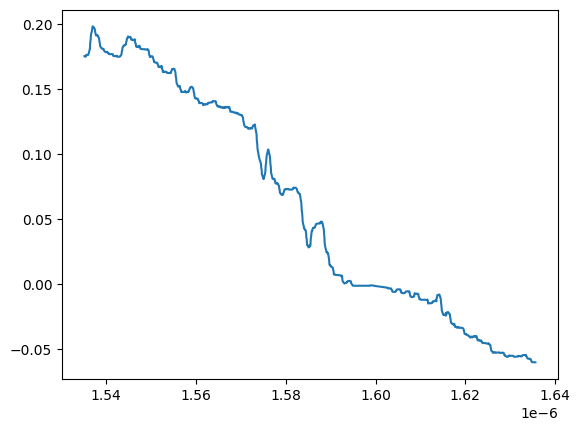

In [4]:
fac = 1e-9


lo = pd.read_csv('data/loss.csv')

lo_x = np.array(lo['x'])
lo_x *= fac
lo_y = np.array(lo['y'])

ri = pd.read_csv("data/ri.csv")
ri_x = np.array(ri['x'])
ri_x *= fac
ri_y = np.array(ri['y'])

per = pd.read_csv("data/permeability.csv")
per_x =  np.array(per['x'])
per_x *= fac
per_y =  np.array(per['y'])

plt.plot(ri_x,ri_y)




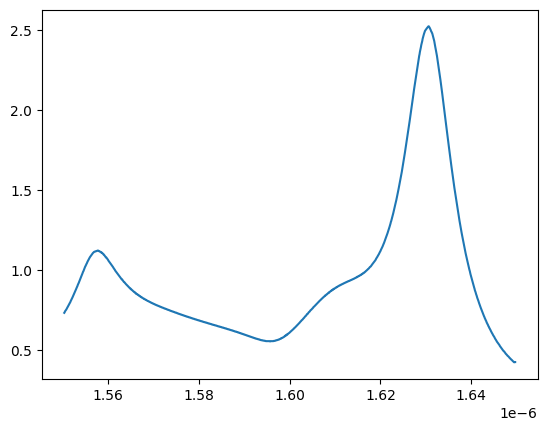

In [5]:
plt.plot(per_x,per_y)

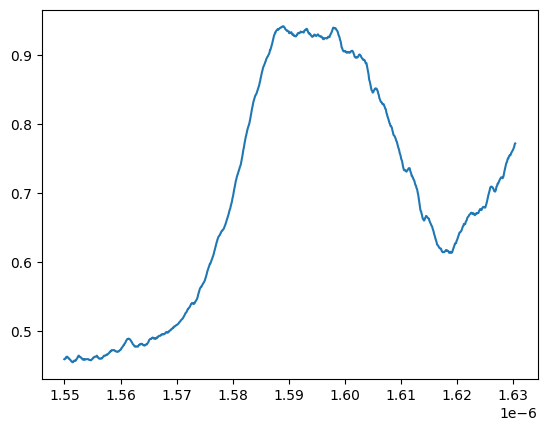

In [6]:
plt.plot(lo_x,lo_y)

In [7]:
pump_wl = 1.600e-6
pump_wl

1.6e-06

In [8]:
signal_wl = 1.580e-6

In [9]:
c0 = 299792458

In [10]:
deltaOmega = 2*np.pi*c0*((pump_wl - signal_wl)/(signal_wl*pump_wl))

In [11]:
lambda_p_number = 1500

In [12]:
lambda_start = 1.562e-6

In [13]:
lambda_end = 1.59888e-6

In [14]:
L = 1.48e-5
L

1.48e-05

In [15]:
n_SI = 3.4757

In [16]:
eps_zero = 8.854e-12

In [17]:
X3 = 2.45e-19

In [18]:
lambda_p = np.linspace(lambda_start,lambda_end, lambda_p_number)


In [19]:
lambda_s = np.divide((2*np.pi*c0*lambda_p),(2*np.pi*c0 + deltaOmega*lambda_p))


In [20]:
lambda_i = np.divide((2*np.pi*c0*lambda_p),(2*np.pi*c0 - deltaOmega*lambda_p))
lambda_s


array([1.54293306e-06, 1.54295706e-06, 1.54298107e-06, ...,
       1.57885983e-06, 1.57888382e-06, 1.57890782e-06])

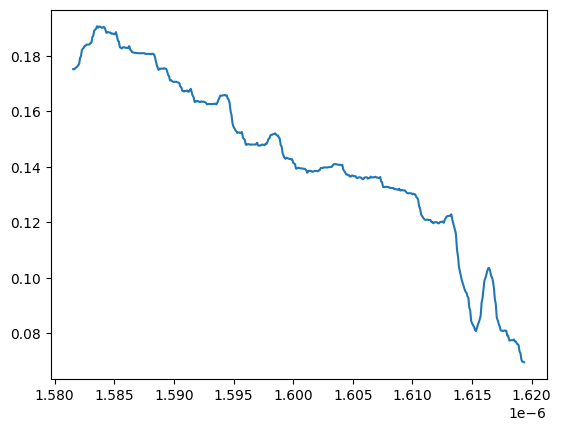

In [21]:
n_fun = interp1d(ri_x, ri_y,fill_value = "extrapolate")
n_p = n_fun(lambda_p)
n_s =n_fun(lambda_s)
 
n_i = n_fun(lambda_i)
plt.plot(lambda_i,n_s)



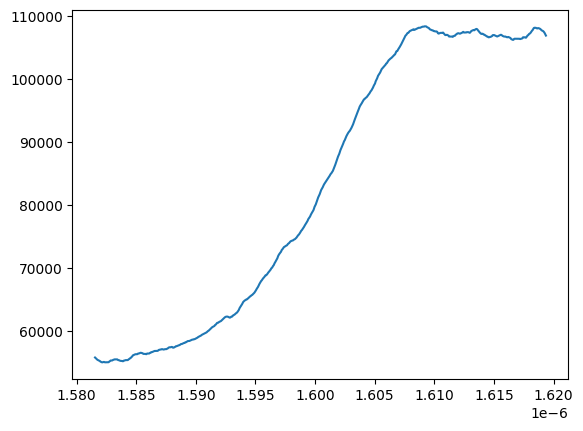

In [22]:
fac = 1e6*math.log(10)/20
loss_fun = interp1d(lo_x,lo_y,kind ="linear",fill_value = "extrapolate")
loss_p = loss_fun(lambda_p)*fac
loss_s = loss_fun(lambda_s)*fac
loss_i = loss_fun(lambda_i)*fac
plt.plot(lambda_i,loss_p)


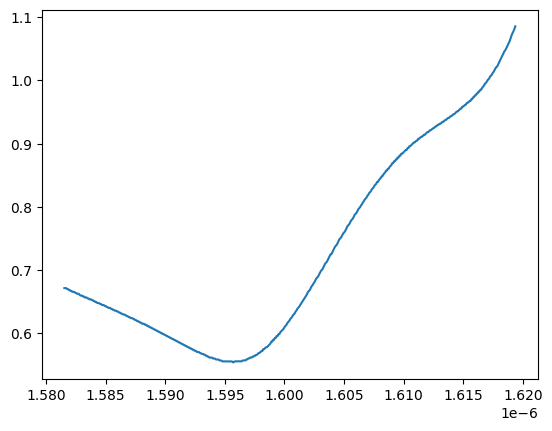

In [23]:
per_fun = interp1d(per_x,per_y,fill_value = "extrapolate")
per_i = per_fun(lambda_i)
# 
plt.plot(lambda_i,per_i)

In [24]:
lambda_p

array([1.56200000e-06, 1.56202460e-06, 1.56204921e-06, ...,
       1.59883079e-06, 1.59885540e-06, 1.59888000e-06])

In [25]:
k_p = 2*np.pi*np.divide(n_p,lambda_p)
k_s = 2*np.pi*np.divide(n_s,lambda_s)
k_i = 2*np.pi*np.divide(n_i,lambda_i)
k_i

array([ 290814.42750958,  291438.94043147,  291451.66005598, ...,
       -132090.42677848, -132067.80413731, -132088.4964067 ])

In [26]:
delta_k_fw = 2*k_p -  k_s - k_i
delta_k_bw = 2*k_p -  k_s + k_i
delta_a = 2*loss_p + loss_s

delta_a

array([157486.53808808, 157433.81055323, 157361.66454184, ...,
       289940.71592202, 289796.58369153, 289652.45144317])

In [27]:
w_i = np.divide(2*np.pi*c0,lambda_i)


In [28]:
Omega_fw = ((3.0/2)*X3) * np.divide(np.multiply(w_i,per_i),c0)
# s = np.exp(-(2*loss_p +loss_s)*L)
# s_1 = np.multiply(s,per_i)
# s_4 = np.multiply(s_1,w_i)
# s_2 = s_4/c0
# Omega_bw  = s_2 *((3.0/2)*X3)
Omega_bw = ((3.0/2)*X3) * np.divide(np.multiply(w_i,np.multiply(np.exp(-(2*loss_p +loss_s)*L),per_i)),c0)


In [29]:
Omega_fw

array([9.80678678e-13, 9.80663038e-13, 9.80647399e-13, ...,
       1.54340846e-12, 1.54538619e-12, 1.54752167e-12])

In [30]:
idler_amp_fw = (1j * np.multiply(Omega_fw,np.divide(np.exp((1j*delta_k_fw - delta_a)*L) - np.exp(-loss_i*L),1j*delta_k_fw + loss_i - delta_a)))
idler_amp_fw

array([-1.37726677e-18+1.80434985e-18j, -1.37056895e-18+1.81139471e-18j,
       -1.37100906e-18+1.80870988e-18j, ...,
        1.14177632e-18+1.71546781e-18j,  1.14229041e-18+1.71879583e-18j,
        1.14278255e-18+1.72268668e-18j])

In [31]:
# a = np.exp((1j*delta_k_fw - delta_a)*L) - np.exp(-loss_i*L)
# b = 1j*delta_k_fw + loss_i - delta_a
# c = np.divide(a,b)
# idler_amp_fw = 1j*np.multiply(Omega_fw,c)

In [32]:
# a_1 = np.exp((-1j*delta_k_bw + delta_a)*L) - np.exp(-loss_i*L)
# b_1 = -1j*delta_k_bw + loss_i + delta_a
# c_1 = np.divide(a_1,b_1)

# idler_amp_bw = 1j*np.multiply(Omega_bw,c_1)

In [33]:
intensity_fw = (2*n_SI*eps_zero * c0 *abs(np.multiply(idler_amp_fw,idler_amp_fw)))

In [34]:
idler_amp_bw = 1j * np.multiply(Omega_bw,np.divide(np.exp((-1j*delta_k_bw + delta_a)*L) - np.exp(-loss_i*L),-1j*delta_k_bw + loss_i + delta_a))

In [35]:
intensity_bw = 2*n_SI*eps_zero * c0 *abs(np.multiply(idler_amp_bw,idler_amp_bw))

In [36]:
fac = 1e9
lambda_i *=fac


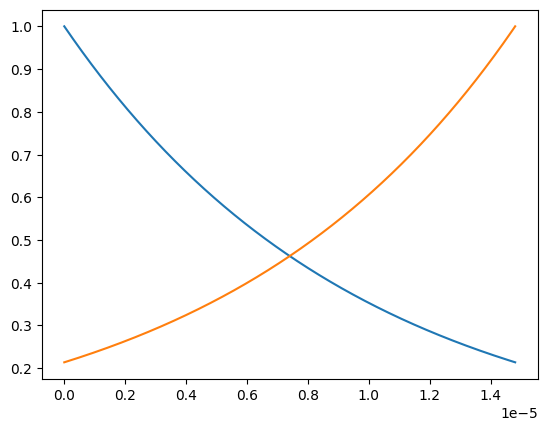

In [37]:
z = np.linspace(0,L,lambda_p_number)
a_p = loss_fun(pump_wl)
fac = 1e6*math.log(10)/20
a_p *=fac
a_p
q = np.exp(-a_p*z)
plt.plot(z,q)
q_1 = np.exp(-a_p*L)*np.exp(+a_p*z)
plt.plot(z,q_1)

(1580.0, 1620.0)

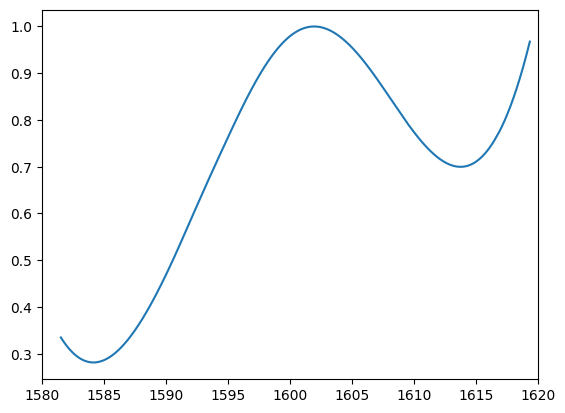

In [48]:
intensity_bw = savgol_filter(intensity_bw, 200, 3)
intensity_bw =  np.divide(intensity_bw, np.max(intensity_bw))
plt.plot(lambda_i,intensity_bw)
plt.xlim(left=1580)  # adjust the right leaving left unchanged
plt.xlim(right=1620)  # adjust the left leaving right unchanged


(1580.0, 1620.0)

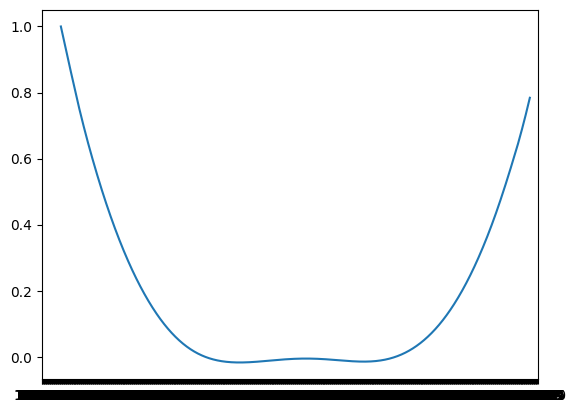

In [52]:
intensity_fw = savgol_filter(intensity_fw, 100, 3)
intensity_fw =  np.divide(intensity_fw, np.max(intensity_fw))
lambda_l = np.linspace(1580,1620, int(lambda_p_number/2))
plt.plot(lambda_i,intensity_fw)
plt.xticks(lambda_l)
plt.xlim(left=1580)  # adjust the right leaving left unchanged
plt.xlim(right=1620)

###### z = np.linspace(0,L, lambda_p_number)